# Importing Libraries

In [1]:
import wandb

wandb.init(project="house-price-regression", name="xgb")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nurch22 (nurch22-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [2]:
! pip install kaggle


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle

In [6]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle competitions download -c walmart-recruiting-store-sales-forecasting

  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 947MB/s]


In [12]:
! unzip walmart-recruiting-store-sales-forecasting

Archive:  walmart-recruiting-store-sales-forecasting.zip
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [13]:
!pip install numpy pandas matplotlib seaborn --quiet

In [14]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 69.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [15]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [16]:
from zipfile import ZipFile

with ZipFile('/content/features.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')

with ZipFile('/content/sampleSubmission.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')

with ZipFile('/content/test.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')

with ZipFile('/content/train.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')

os.listdir('walmart-recruiting-store-sales-forecasting')

['sampleSubmission.csv', 'features.csv', 'train.csv', 'test.csv']

Let's load the data into Pandas dataframes.

In [17]:
features = pd.read_csv("./walmart-recruiting-store-sales-forecasting/features.csv")
stores = pd.read_csv("/content/stores.csv")
walmart = pd.read_csv("./walmart-recruiting-store-sales-forecasting/train.csv")
test = pd.read_csv("./walmart-recruiting-store-sales-forecasting/test.csv")
submission = pd.read_csv("./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv")

In [18]:
print("features.shape", features.shape)
print("stores.shape", stores.shape)
print("walmart.shape", walmart.shape)
print("test.shape", test.shape)
print("submission.shape", submission.shape)

features.shape (8190, 12)
stores.shape (45, 3)
walmart.shape (421570, 5)
test.shape (115064, 4)
submission.shape (115064, 2)


In [19]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [21]:
walmart.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [22]:
test.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [23]:
submission.head(5)

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


Let's merge the information from `stores` into `walmart` and `test`.

In [24]:
merged_df = walmart.merge(stores, how='left').merge(features, how='left')
merged_test_df = test.merge(stores, how='left').merge(features, how='left')

In [25]:
print("merged_df.shape", merged_df.shape)
print("merged_test_df.shape", merged_test_df.shape)

merged_df.shape (421570, 16)
merged_test_df.shape (115064, 15)


In [26]:
import numpy as np
import seaborn as sns
import os
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

#style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline


### Date

First, let's convert `Date` to a `datecolumn` and extract different parts of the date.

In [27]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [28]:
split_date(merged_df)
split_date(merged_test_df)

## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [29]:
merged_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

### Impute missing numerical data

In [31]:
merged_df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


### Exploratory Data Analysis

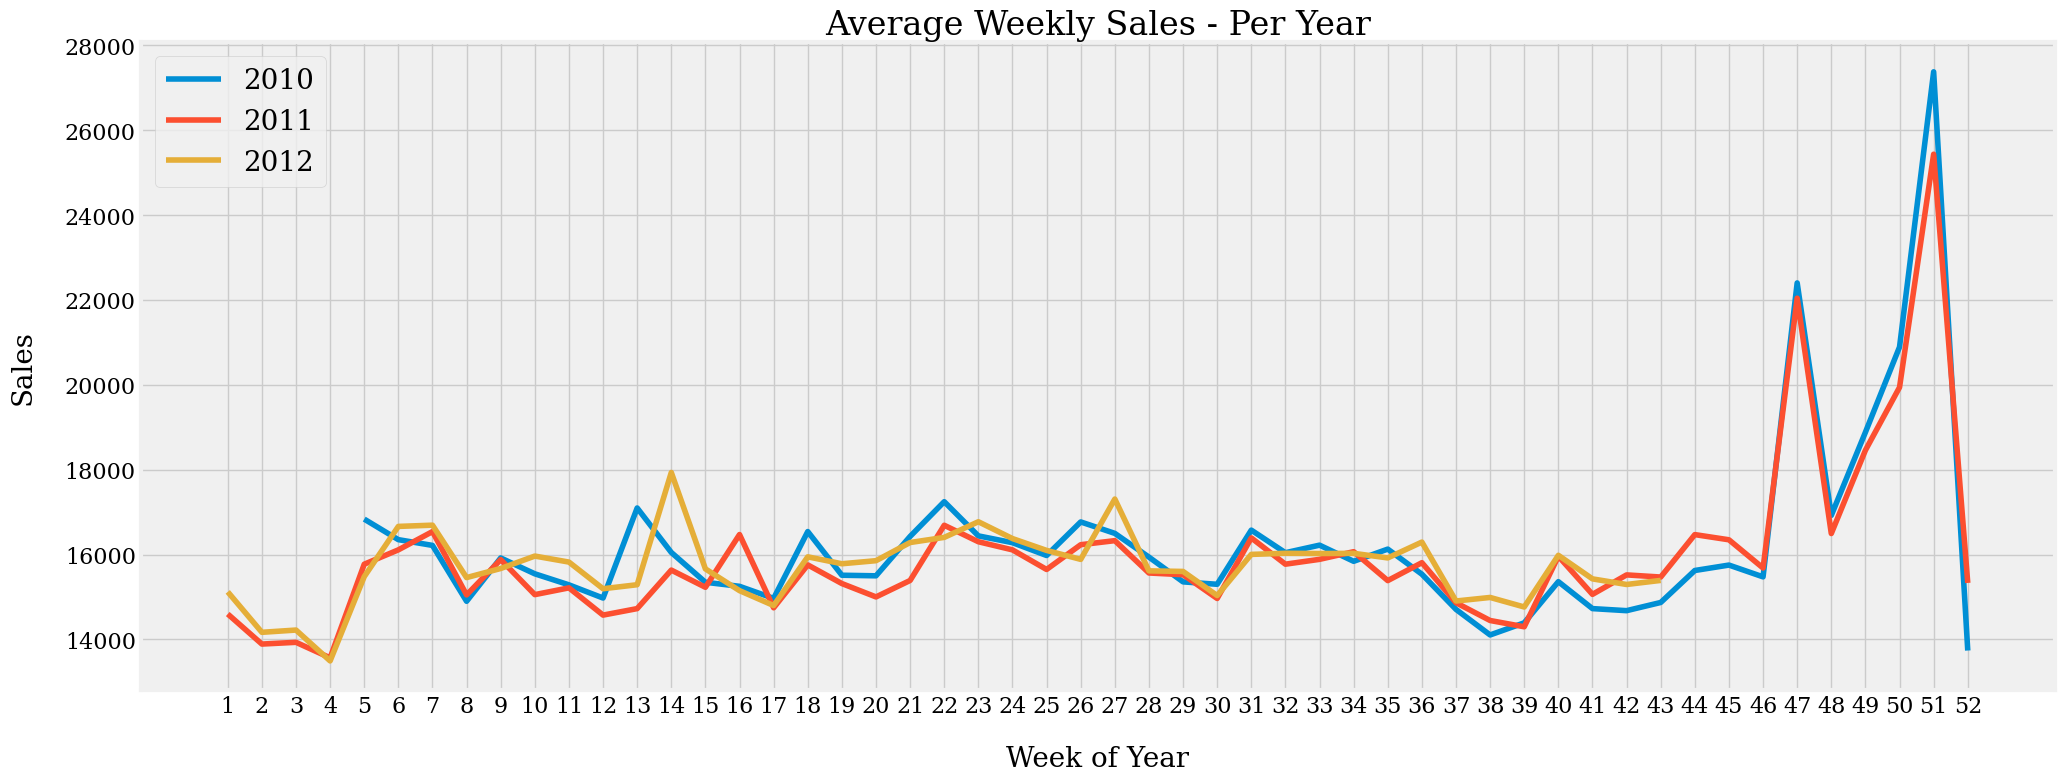

In [32]:
weekly_sales_2010 = merged_df[merged_df.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = merged_df[merged_df.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = merged_df[merged_df.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

In [33]:
merged_df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,2010,3,12,10
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,2010,3,19,11
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,2010,3,26,12
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,2010,4,2,13
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,2010,4,9,14


In [34]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')

Let's also identify Input and Target columns.

In [35]:
input_cols = ['Store', 'Dept', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']
target_col = 'Weekly_Sales'

In [36]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [37]:
test_inputs = merged_test_df[input_cols].copy()

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [38]:
numeric_cols = ['Store', 'Dept', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']
categorical_cols = ['IsHoliday', 'Type']

In [39]:
#numeric_cols = ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'WeekOfYear']
#categorical_cols = ['IsHoliday', 'Type']

In [40]:
inputs[numeric_cols].isna().sum()

,0
Store,0
Dept,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479
MarkDown4,286603
MarkDown5,270138


In [41]:
test_inputs[numeric_cols].isna().sum()

,0
Store,0
Dept,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,149
MarkDown2,28627
MarkDown3,9829
MarkDown4,12888
MarkDown5,0


In [42]:
zero = 0
zero

0

In [43]:
inputs['MarkDown1'] = inputs['MarkDown1'].fillna(zero)
inputs['MarkDown2'] = inputs['MarkDown2'].fillna(zero)
inputs['MarkDown3'] = inputs['MarkDown3'].fillna(zero)
inputs['MarkDown4'] = inputs['MarkDown4'].fillna(zero)
inputs['MarkDown5'] = inputs['MarkDown5'].fillna(zero)
test_inputs['MarkDown1'] = test_inputs['MarkDown1'].fillna(zero)
test_inputs['MarkDown2'] = test_inputs['MarkDown2'].fillna(zero)
test_inputs['MarkDown3'] = test_inputs['MarkDown3'].fillna(zero)
test_inputs['MarkDown4'] = test_inputs['MarkDown4'].fillna(zero)
test_inputs['MarkDown5'] = test_inputs['MarkDown5'].fillna(zero)

In [44]:
mean_CPI = inputs.CPI.mean()
mean_Unemployment = inputs.Unemployment.mean()

In [45]:
inputs['CPI'] = inputs['CPI'].fillna(mean_CPI)
inputs['Unemployment'] = inputs['Unemployment'].fillna(mean_Unemployment)
test_inputs['CPI'] = test_inputs['CPI'].fillna(mean_CPI)
test_inputs['Unemployment'] = test_inputs['Unemployment'].fillna(mean_Unemployment)

In [46]:
test_inputs[numeric_cols].isna().sum()

,0
Store,0
Dept,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0


In [47]:
inputs[numeric_cols].isna().sum()

,0
Store,0
Dept,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0


### Scale Numeric Values

Let's scale numeric values to the 0 to 1 range.

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [50]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### Encode Categorical Columns


Let's one-hot encode categorical columns.

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(test_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols1 = list(encoder1.get_feature_names_out(categorical_cols))

In [53]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols1] = encoder1.transform(test_inputs[categorical_cols])

Finally, let's extract out all the numeric data for training.

In [54]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols1]

### Training

To train a GBM, we can use the `XGBRegressor` class from the [`XGBoost`](https://xgboost.readthedocs.io/en/latest/) library.

In [55]:
from xgboost import XGBRegressor

In [56]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

Let's train the model using `model.fit`.

In [57]:
%%time
model.fit(X, targets)

CPU times: user 2.95 s, sys: 141 ms, total: 3.09 s
Wall time: 3.24 s


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Prediction

We can now make predictions and evaluate the model using `model.predict`.

In [58]:
preds = model.predict(X)

### Prediction

Let's predict the submission set directly.

In [59]:
preds1 = model.predict(X_test)

### Evaluation

Let's evaluate the predictions using RMSE error.

In [60]:
from sklearn.metrics import mean_squared_error
import numpy as np

def wmae(y_true, y_pred, weights):
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

In [62]:
wmae(preds, targets, weights=inputs['IsHoliday'])

np.float64(7372.609016621548)

### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [63]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

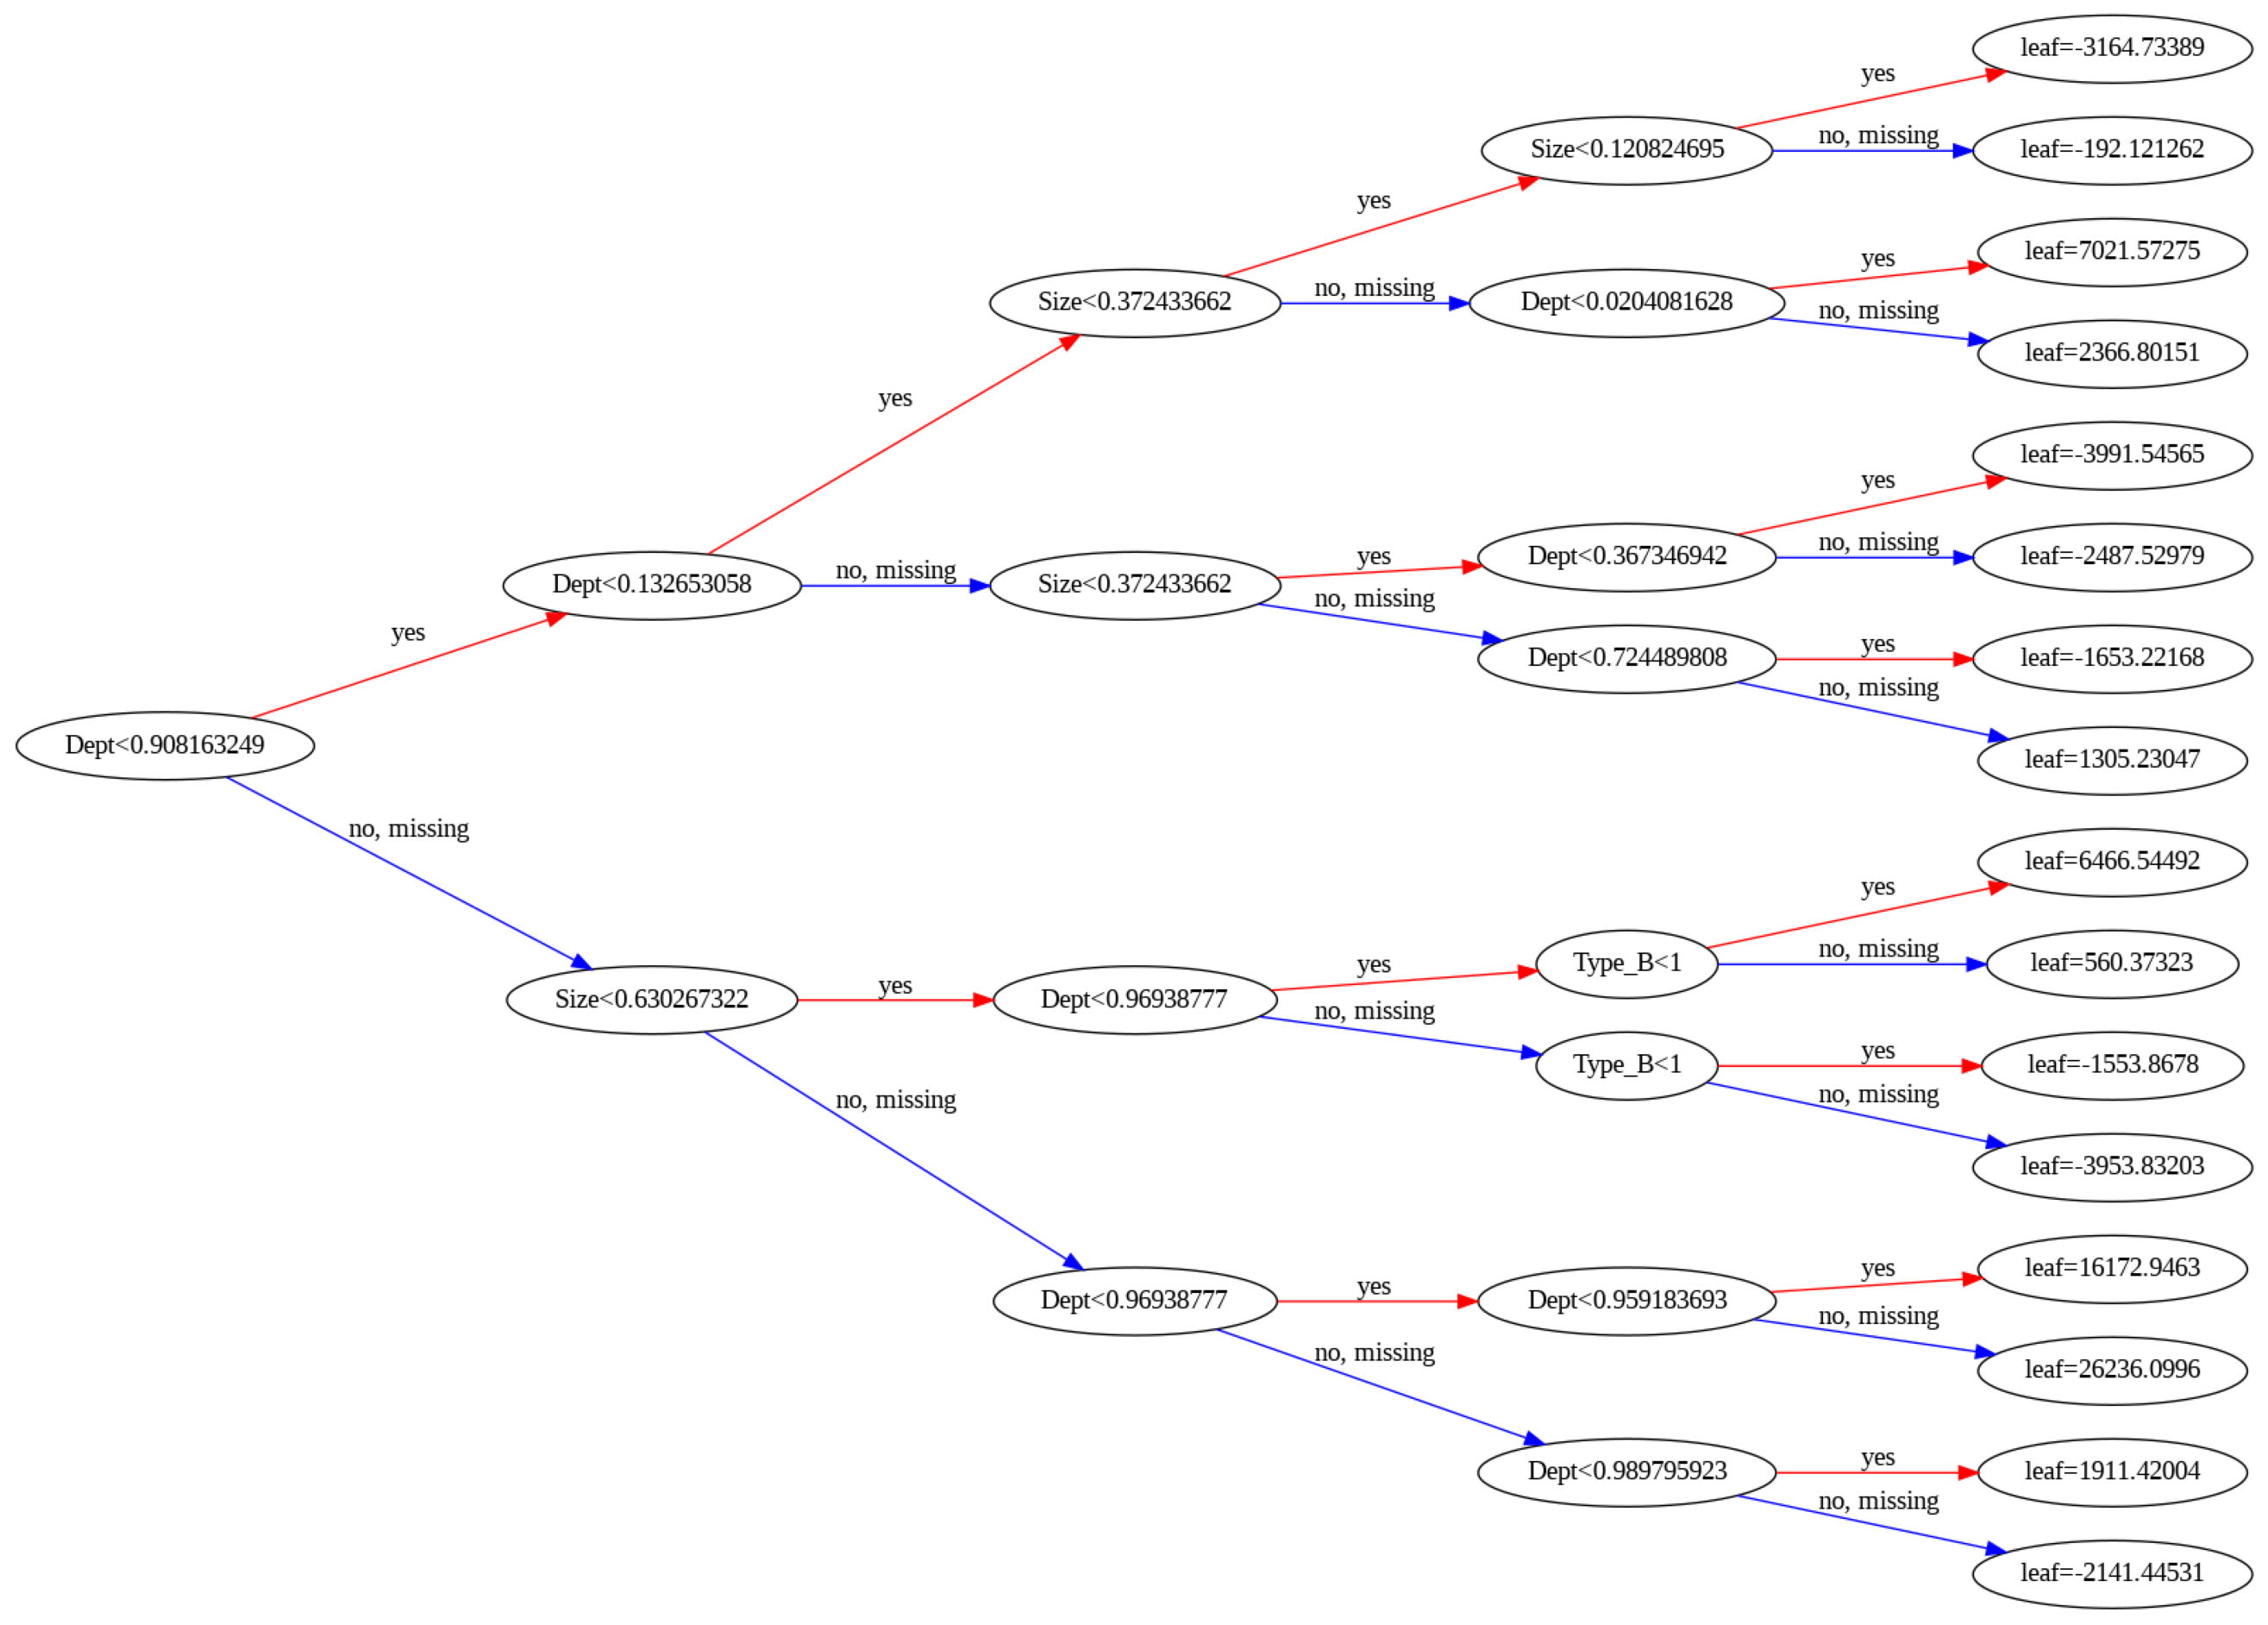

In [64]:
plot_tree(model, rankdir='LR');

/usr/local/lib/python3.11/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


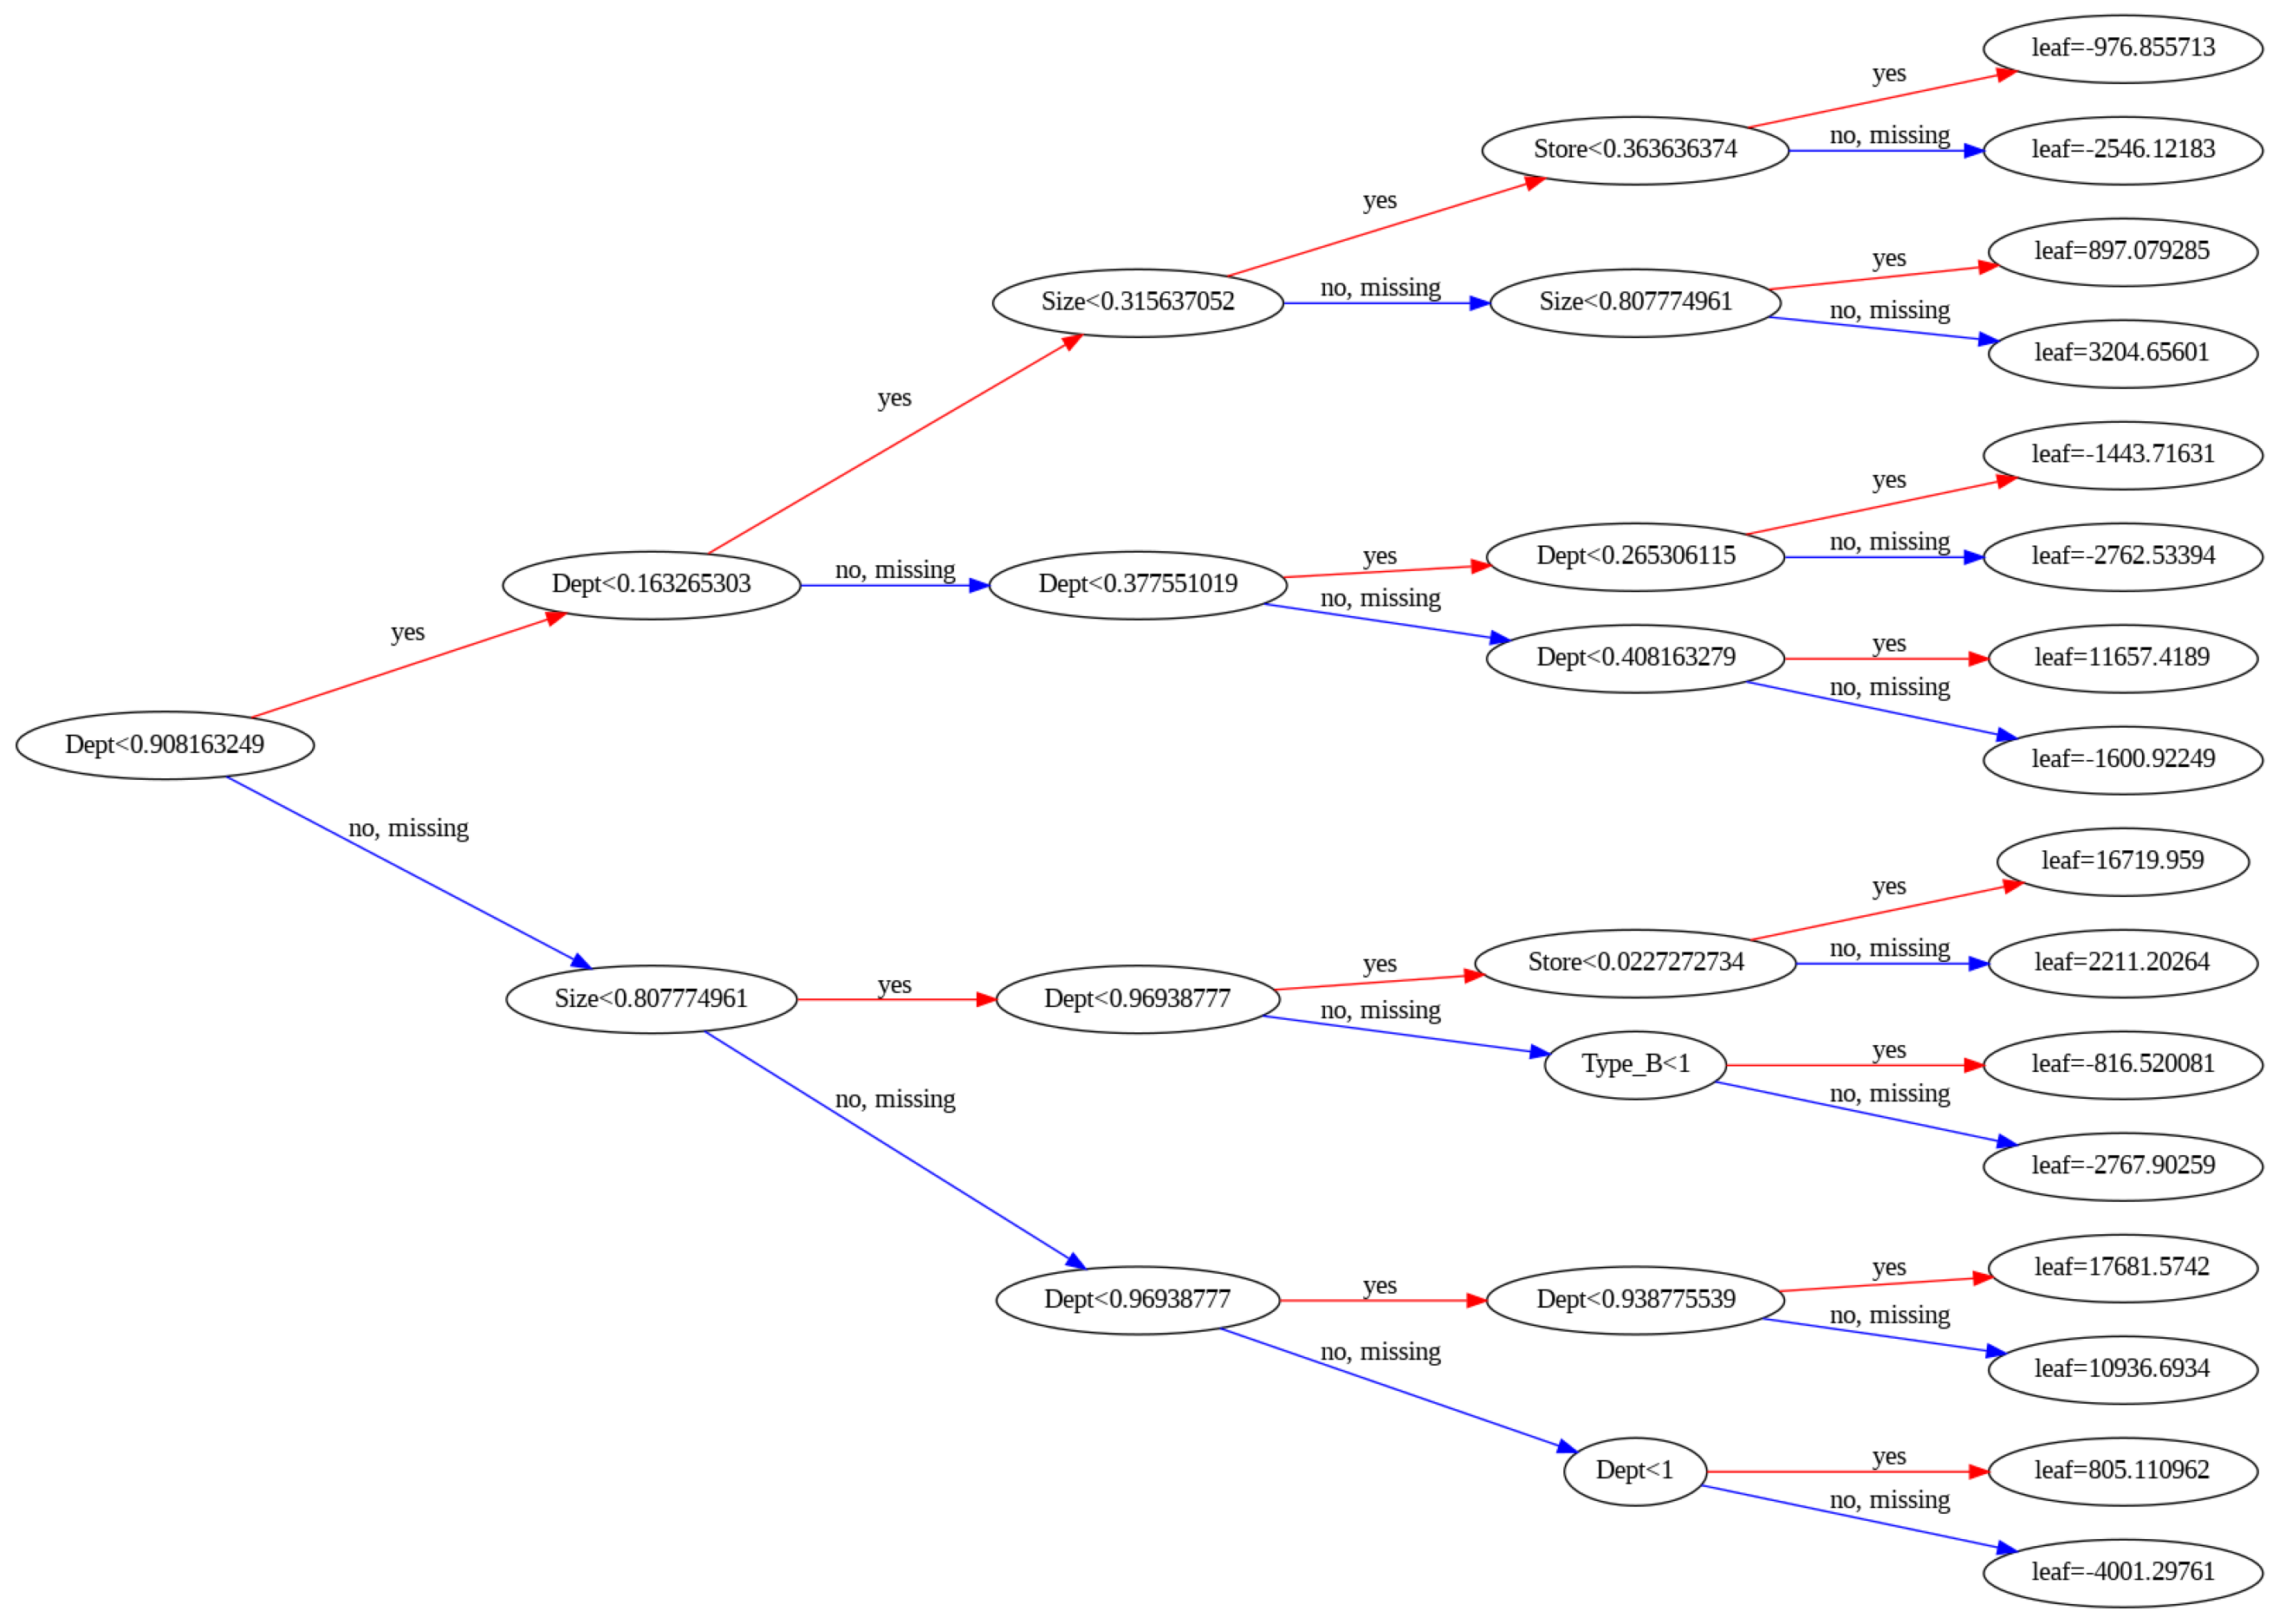

In [65]:
plot_tree(model, rankdir='LR', num_trees=1);

In [66]:
trees = model.get_booster().get_dump()

In [67]:
len(trees)

20

In [68]:
print(trees[0])

0:[Dept<0.908163249] yes=1,no=2,missing=2
	1:[Dept<0.132653058] yes=3,no=4,missing=4
		3:[Size<0.372433662] yes=7,no=8,missing=8
			7:[Size<0.120824695] yes=15,no=16,missing=16
				15:leaf=-3164.73389
				16:leaf=-192.121262
			8:[Dept<0.0204081628] yes=17,no=18,missing=18
				17:leaf=7021.57275
				18:leaf=2366.80151
		4:[Size<0.372433662] yes=9,no=10,missing=10
			9:[Dept<0.367346942] yes=19,no=20,missing=20
				19:leaf=-3991.54565
				20:leaf=-2487.52979
			10:[Dept<0.724489808] yes=21,no=22,missing=22
				21:leaf=-1653.22168
				22:leaf=1305.23047
	2:[Size<0.630267322] yes=5,no=6,missing=6
		5:[Dept<0.96938777] yes=11,no=12,missing=12
			11:[Type_B<1] yes=23,no=24,missing=24
				23:leaf=6466.54492
				24:leaf=560.37323
			12:[Type_B<1] yes=25,no=26,missing=26
				25:leaf=-1553.8678
				26:leaf=-3953.83203
		6:[Dept<0.96938777] yes=13,no=14,missing=14
			13:[Dept<0.959183693] yes=27,no=28,missing=28
				27:leaf=16172.9463
				28:leaf=26236.0996
			14:[Dept<0.989795923] yes=29,no=30,

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [69]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [70]:
importance_df.head(10)

,feature,importance
1,Dept,0.252054
2,Size,0.212212
7,MarkDown3,0.147433
19,Type_B,0.100554
0,Store,0.060985
10,CPI,0.057803
15,WeekOfYear,0.056886
20,Type_C,0.048748
11,Unemployment,0.032211
14,Day,0.019641


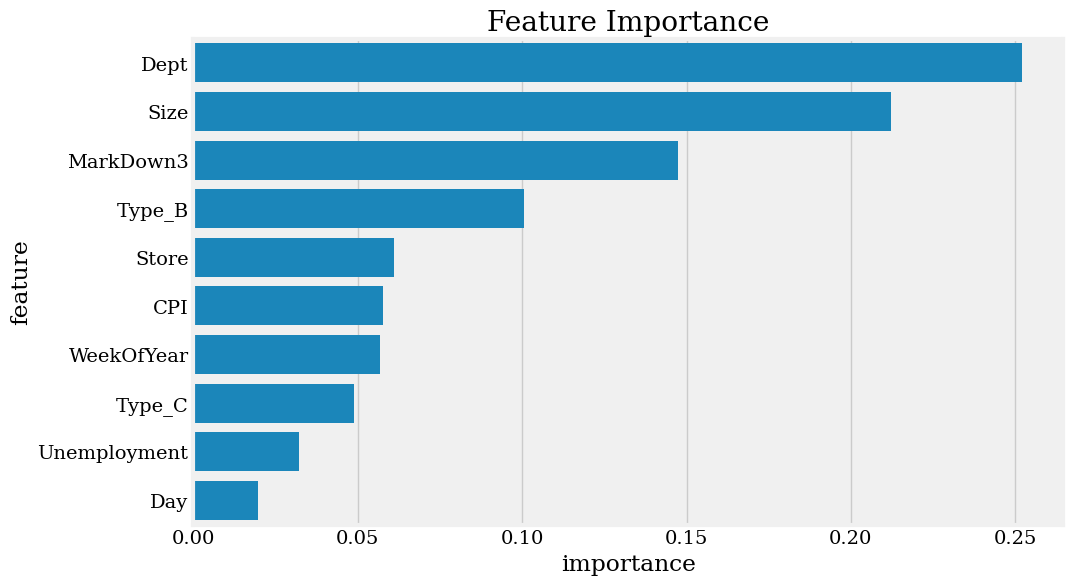

In [71]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## K Fold Cross Validation

Notice that we didn't create a validation set before training our XGBoost model. We'll use a different validation strategy this time, called K-fold cross validation

In [72]:
from sklearn.model_selection import KFold

Scikit-learn provides utilities for performing K fold cross validation.

Let's define a helper function `train_and_evaluate` which trains a model the given parameters and returns the trained model, training error and validation error.

In [79]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_wmae = wmae(model.predict(X_train), train_targets, weights=X_train['IsHoliday_True'])
    val_wmae = wmae(model.predict(X_val), val_targets, weights=X_val['IsHoliday_True'])
    return model, train_wmae, val_wmae

Now, we can use the `KFold` utility to create the different training/validations splits and train a separate model for each fold.

In [77]:
kfold = KFold(n_splits=5)

In [80]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_wmae, val_wmae = train_and_evaluate(X_train,
                                                     train_targets,
                                                     X_val,
                                                     val_targets,
                                                     max_depth=4,
                                                     n_estimators=20)
    models.append(model)
    print('Train wmae: {}, Validation wmae: {}'.format(train_wmae, val_wmae))

Train wmae: 7501.50563257285, Validation wmae: 9558.493771526686
Train wmae: 7255.874772038386, Validation wmae: 10633.858631442963
Train wmae: 7304.522695213925, Validation wmae: 10378.614263922193
Train wmae: 7590.48183326636, Validation wmae: 7615.328936818613
Train wmae: 8064.590865017357, Validation wmae: 8187.426116329606


Let's also define a function to average predictions from the 5 different models.

In [81]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [82]:
preds = predict_avg(models, X)

## Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.


In [83]:
model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Here's a helper function to test hyperparameters with K-fold cross validation.

In [84]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try, we'll just pick a random 10% sample of the dataset as the validation set.

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [91]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_wmae = wmae(model.predict(X_train), train_targets, weights=X_train['IsHoliday_True'])
    val_wmae = wmae(model.predict(X_val), val_targets, weights=X_val['IsHoliday_True'])
    print('Train wmae: {}, Validation wmae: {}'.format(train_wmae, val_wmae))

#### `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.


In [92]:
test_params(n_estimators=10)

Train wmae: 6720.463435172754, Validation wmae: 6612.299487252742


In [93]:
test_params(n_estimators=100)

Train wmae: 3562.5694638022615, Validation wmae: 3668.970433140613


In [94]:
test_params(n_estimators=500)

Train wmae: 2204.8210218924896, Validation wmae: 2703.656753304638


#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [95]:
test_params(max_depth=2)

Train wmae: 8048.745812946413, Validation wmae: 8056.171824559769


In [96]:
test_params(max_depth=15)

Train wmae: 228.40790226893122, Validation wmae: 1911.6431299810358


#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [97]:
test_params(n_estimators=50, learning_rate=0.01)

Train wmae: 11943.750475800267, Validation wmae: 11836.915853900182


In [98]:
test_params(n_estimators=500, learning_rate=0.9)

Train wmae: 2109.226964559157, Validation wmae: 3027.310376991902


In [99]:
test_params(n_estimators=500, learning_rate=0.9, max_depth=15)

Train wmae: 0.020069540652388827, Validation wmae: 2736.7669591596937


#### `booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [100]:
test_params(booster='gblinear')

Train wmae: 15651.587369800447, Validation wmae: 15554.975442846853


## Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters.

In [101]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000,
                     learning_rate=0.2, max_depth=10, subsample=0.9,
                     colsample_bytree=0.7)

In [102]:
model1 = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000,
                     learning_rate=0.9, max_depth=15, subsample=0.9,
                     colsample_bytree=0.7)

In [103]:
%%time
model.fit(X, targets)

CPU times: user 1min 58s, sys: 375 ms, total: 1min 59s
Wall time: 1min 9s


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [104]:
%%time
model1.fit(X, targets)

CPU times: user 9min 35s, sys: 4.36 s, total: 9min 39s
Wall time: 5min 42s


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Now that the model is trained, we can make predictions on the test set.

model is by using (n_jobs=-1, random_state=42, n_estimators=1000,
                     learning_rate=0.2, max_depth=10, subsample=0.9,
                     colsample_bytree=0.7)) these parameters

In [105]:
test_preds_sub = model.predict(X_test)

In [106]:
test_preds = model.predict(X)

model1 is by using (n_jobs=-1, random_state=42, n_estimators=1000,
                     learning_rate=0.9, max_depth=15, subsample=0.9,
                     colsample_bytree=0.7) these tested parameters

In [107]:
test_preds1 = model1.predict(X)

In [108]:
test_preds_sub1 = model1.predict(X_test)

In [110]:
wmae(test_preds, targets, weights=inputs['IsHoliday'])

np.float64(562.984838961113)

In [112]:
wmae(test_preds1, targets, weights=inputs['IsHoliday'])

np.float64(0.003363316471331352)

In [114]:
wmae(preds, targets, weights=inputs['IsHoliday'])

np.float64(7616.884683751036)

We tested final regult with XGBRegressor without any useful parameters and with parameters

In [116]:
# prompt: log model and metrics on wandb

# Log model and metrics to wandb
wandb.log({"train_wmae": wmae(preds, targets, weights=inputs['IsHoliday'])}) # Assuming `preds` is from the first model training

# Log the trained model (example using a simple save/load)
# You might need to adjust this based on your model saving strategy
model.save_model("xgb_model.json")
wandb.save("xgb_model.json")


# Example of logging metrics from the hyperparameter tuning section (using the train_test_split)
# You would need to capture the train and validation RMSE after calling test_params
# For simplicity, let's assume you log the last tested parameters and their performance
# You might want to iterate through different parameter settings and log them in a loop
# For example:
# params_to_test = [
#     {'n_estimators': 10},
#     {'n_estimators': 100},
#     # ... more parameters
# ]
# for params in params_to_test:
#     model_hp = XGBRegressor(n_jobs=-1, random_state=42, **params)
#     model_hp.fit(X_train, train_targets)
#     train_rmse_hp = rmse(model_hp.predict(X_train), train_targets)
#     val_rmse_hp = rmse(model_hp.predict(X_val), val_targets)
#     wandb.log({f"hp_train_rmse_{str(params)}": train_rmse_hp, f"hp_val_rmse_{str(params)}": val_rmse_hp, "hyperparameters": params})

# Log the metrics for the final models
wandb.log({"final_model_wmae": wmae(test_preds, targets, weights=inputs['IsHoliday'])})
wandb.log({"final_model1_wmae": wmae(test_preds1, test_preds, weights=inputs['IsHoliday'])})

# You can also log the final trained models if desired
model.save_model("final_xgb_model_params1.json")
model1.save_model("final_xgb_model_params2.json")
wandb.save("final_xgb_model_params1.json")
wandb.save("final_xgb_model_params2.json")

# Finish the wandb run
wandb.finish()


final_model1_wmae,▁
final_model_wmae,▁
train_wmae,▁
final_model1_wmae,562.98486
final_model_wmae,562.98484
train_wmae,7616.88468


Creating Submitting file

In [117]:
submission

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [118]:
test_preds1.shape

(421570,)

In [119]:
submission['Weekly_Sales'] = test_preds_sub1
submission.to_csv('submission.csv',index=False)